In [0]:
#This is a sentiment analysis program that parses the tweet fetched from Twitter using Python
#Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [0]:
# Twitter Api Credentials
Consumer_Key = "xxxxxxxxxxxxxxxxx"
Consumer_Secret_Key = "xxxxxxxxxxxxxxxxxx"
Access_Token = "xxxxxxxxxxxxxxxxxxxxxxxxxx"
Access_Token_Secret = "xxxxxxxxxxxxxxxxxxxx"

In [0]:
#create the Authentication object
authenticate = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)

#Set the access token and access token secret
authenticate.set_access_token(Access_Token,Access_Token_Secret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit= True)

In [0]:
search_words = "#GERD"
date_since = "2020-03-01"

In [0]:
# Searching of 5000 tweets by using a keyword GERD 
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5000)

In [7]:
tweets

In [0]:
#extracting tweet_details from tweet object 
tweet_details1 = [[tweet.text] for tweet in tweets]

In [9]:
tweet_details

[[None,
  "RT @iyoba4u: Isn't it beautiful !! 💚💛❤️\n#ItsmyDam #GERD 💚💛❤️ https://t.co/P37U4byLyu",
  'YDLala',
  'Bossnation'],
 [None,
  'RT @mfaethiopia: Minister of Water, Irrigation &amp; Electricity @seleshi_b_a\n&amp; SM @mfaethiopia @RedwanHussien briefed African ambassadors resi…',
  'TeshomeGenet',
  'Beijing, China'],
 [None,
  'RT @GeduAndargachew: #Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…',
  'TeshomeGenet',
  'Beijing, China'],
 [None,
  "RT @mesfine: #Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in #Ethiopia. Harmful to Egypt's own long-…",
  'duzi95696104',
  ''],
 [None,
  'RT @iyoba4u: Nile: River of Discord between Egypt &amp; Ethiopia - #GERD\n👉\n✅ The move has riled a c/section of people in z region, who believed…',
  '140word',
  'London'],
 [None,
  'We #Ethiopian ppl are focused on very sensitive and important issues, mainly to protect us from #

In [0]:
import pandas as pd

In [0]:
#Assigning extracted tweet details to pandas data frame 
tweet_df = pd.DataFrame(data=tweet_details, columns=['geo','text','user', "location"])

In [0]:
#Assigning extracted tweet details to pandas data frame 
tweet_df1 = pd.DataFrame(data=tweet_details1, columns=['text'])

In [17]:
pd.set_option('max_colwidth', 800)

#geeting the first 20 tweet from the data frame
tweet_df.head(20)

,geo,text,user,location
0,None,RT @iyoba4u: Isn't it beautiful !! 💚💛❤️\n#ItsmyDam #GERD 💚💛❤️ https://t.co/P37U4byLyu,YDLala,Bossnation
1,None,"RT @mfaethiopia: Minister of Water, Irrigation &amp; Electricity @seleshi_b_a\n&amp; SM @mfaethiopia @RedwanHussien briefed African ambassadors resi…",TeshomeGenet,"Beijing, China"
2,None,RT @GeduAndargachew: #Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…,TeshomeGenet,"Beijing, China"
3,None,RT @mesfine: #Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in #Ethiopia. Harmful to Egypt's own long-…,duzi95696104,
4,None,"RT @iyoba4u: Nile: River of Discord between Egypt &amp; Ethiopia - #GERD\n👉\n✅ The move has riled a c/section of people in z region, who believed…",140word,London
5,None,"We #Ethiopian ppl are focused on very sensitive and important issues, mainly to protect us from #Covid19 devastatio… https://t.co/gOIYLAPYXK",abiyot99,Addis Ababa
6,None,"Nile: River of Discord between Egypt &amp; Ethiopia - #GERD\n👉\n✅ The move has riled a c/section of people in z region, w… https://t.co/d4B8xk2cJQ",iyoba4u,Ethiopia
7,None,RT @EmebetGAbate: The UN Secretary General @antonioguterres \nhas suggested for the parties to go back to the drawing board i.e 2015 Declara…,amitabhprevi,India
8,None,"RT @addisstandard: #Ethiopia: #UN Secretary-General António Guterres underscores the importance of the 2015 DoP on the #GERD, which emphasi…",Dochker,Addis Ababa
9,None,RT @DailyNewsEgypt: #Sudan rejects #Ethiopia's partial agreement to fill #GERD without #Egypt https://t.co/0g8xL1TxAB,MusiSoliyana,Monaco


In [20]:
#show who are the user and how many times commenting 
tweet_df.user.value_counts()

iyoba4u            83
itsmydam1          41
Tiruneh17          39
BerhanuMegerssa    32
FDisputes          29
                   ..
MhmdEmad20          1
Gfasil              1
Eba31952307         1
aibrahimhamed       1
masiyaslema         1
Name: user, Length: 1009, dtype: int64

In [21]:
#location of the user who is commenting 
tweet_df.location.value_counts()

                                  578
Ethiopia                          222
Addis Ababa                        53
London                             28
Memphis, TN                        27
                                 ... 
Barranquilla, Colombia              1
Bucureşti, România                  1
۰•● ❤ ●•۰                           1
L'Haÿ-les-Roses, France             1
Lungsod ng Marikina, Pambansan      1
Name: location, Length: 445, dtype: int64

In [0]:
#Cleaning the tweets by using clean_tweets function
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [0]:
#Applying lamda and clean_tweets funtion on the tweet text
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

In [24]:
#Showing 20 tweets 
tweet_df.head(20)

,geo,text,user,location
0,None,Isn't it beautiful !! 💚💛❤️#ItsmyDam #GERD 💚💛❤️,YDLala,Bossnation
1,None,"Minister of Water, Irrigation &amp; Electricity &amp; SM briefed African ambassadors resi…",TeshomeGenet,"Beijing, China"
2,None,#Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…,TeshomeGenet,"Beijing, China"
3,None,#Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in #Ethiopia. Harmful to Egypt's own long-…,duzi95696104,
4,None,"Nile: River of Discord between Egypt &amp; Ethiopia - #GERD👉✅ The move has riled a c/section of people in z region, who believed…",140word,London
5,None,"We #Ethiopian ppl are focused on very sensitive and important issues, mainly to protect us from #Covid19 devastatio…",abiyot99,Addis Ababa
6,None,"Nile: River of Discord between Egypt &amp; Ethiopia - #GERD👉✅ The move has riled a c/section of people in z region, w…",iyoba4u,Ethiopia
7,None,The UN Secretary General has suggested for the parties to go back to the drawing board i.e 2015 Declara…,amitabhprevi,India
8,None,"#Ethiopia: #UN Secretary-General António Guterres underscores the importance of the 2015 DoP on the #GERD, which emphasi…",Dochker,Addis Ababa
9,None,#Sudan rejects #Ethiopia's partial agreement to fill #GERD without #Egypt,MusiSoliyana,Monaco


In [0]:
#saving cleaned tweet to csv file 
tweet_df.to_csv('GERD_tweets.csv')

In [27]:
#clean the text
#Create a function to clean the Tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mention
  text=re.sub(r'#','',text)#Removing the # symbol
  text=re.sub(r'RT[\s]+','',text)#Removing RT
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper link 

  return text

#Cleaning the text 
tweet_df_new=pd.DataFrame(data=tweet_df, columns=['text'])
tweet_df_new['text']=tweet_df['text'].apply(cleanTxt)

#show the cleaned Text
tweet_df_new

,text
0,Isn't it beautiful !! 💚💛❤️ItsmyDam GERD 💚💛❤️
1,"Minister of Water, Irrigation &amp; Electricity &amp; SM briefed African ambassadors resi…"
2,Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…
3,Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in Ethiopia. Harmful to Egypt's own long-…
4,"Nile: River of Discord between Egypt &amp; Ethiopia - GERD👉✅ The move has riled a c/section of people in z region, who believed…"
...,...
1775,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…
1776,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…
1777,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…
1778,"Way forward with GERD process not clearEgypt, Sudan rejected Ethiopian April 10 proposal to discuss deal on first phase…"


In [28]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to create a polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new column 
tweet_df_new['subjectivity']=tweet_df_new['text'].apply(getSubjectivity)
tweet_df_new['polarity']=tweet_df_new['text'].apply(getPolarity)

#show the new dataframe with the new column 
tweet_df_new


,text,subjectivity,polarity
0,Isn't it beautiful !! 💚💛❤️ItsmyDam GERD 💚💛❤️,1.000000,1.000
1,"Minister of Water, Irrigation &amp; Electricity &amp; SM briefed African ambassadors resi…",0.000000,0.000
2,Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…,0.425000,0.225
3,Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in Ethiopia. Harmful to Egypt's own long-…,0.616667,0.100
4,"Nile: River of Discord between Egypt &amp; Ethiopia - GERD👉✅ The move has riled a c/section of people in z region, who believed…",0.000000,0.000
...,...,...,...
1775,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050
1776,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050
1777,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050
1778,"Way forward with GERD process not clearEgypt, Sudan rejected Ethiopian April 10 proposal to discuss deal on first phase…",0.333333,0.250


<function matplotlib.pyplot.show>

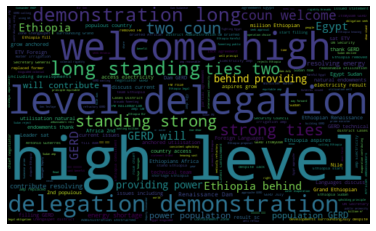

In [29]:
#plot the word cloud 
allwords=' '.join([twts for twts in tweet_df_new['text']])
wordCloud=WordCloud(width=500,height=300, random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="Bilinear")
plt.axis('off')
plt.show

In [31]:
#Create a function to compute negative, nutral and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Nutral'
  else:
    return 'Positive'

tweet_df_new['Analysis']=tweet_df_new['polarity'].apply(getAnalysis)

#show the dataframe 
tweet_df_new

,text,subjectivity,polarity,Analysis
0,Isn't it beautiful !! 💚💛❤️ItsmyDam GERD 💚💛❤️,1.000000,1.000,Positive
1,"Minister of Water, Irrigation &amp; Electricity &amp; SM briefed African ambassadors resi…",0.000000,0.000,Nutral
2,Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…,0.425000,0.225,Positive
3,Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in Ethiopia. Harmful to Egypt's own long-…,0.616667,0.100,Positive
4,"Nile: River of Discord between Egypt &amp; Ethiopia - GERD👉✅ The move has riled a c/section of people in z region, who believed…",0.000000,0.000,Nutral
...,...,...,...,...
1775,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050,Positive
1776,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050,Positive
1777,Ethiopia aspires to grow anchored in utilisation of our natural endowments. I thank the GERD technical team for their up…,0.250000,0.050,Positive
1778,"Way forward with GERD process not clearEgypt, Sudan rejected Ethiopian April 10 proposal to discuss deal on first phase…",0.333333,0.250,Positive


In [33]:
#print all the positive tweets 
j=1
sortedDF=tweet_df_new.sort_values(by=['polarity'])
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+ ')'+sortedDF['text'][i])
    print()
    j=j+1

1) Isn't it beautiful !! 💚💛❤️ItsmyDam GERD 💚💛❤️ 

2) Ethiopia has been consistent in upholding the principle of equitable &amp; reasonable utilization as well as the principl…

3) Egypt|s misguided colonial rigidity and bravado is only fomenting public animosity in Ethiopia. Harmful to Egypt's own long-…

4)We Ethiopian ppl are focused on very sensitive and important issues, mainly to protect us from Covid19 devastatio… 

5) The UN Secretary General  has suggested for the parties to go back to the drawing board i.e 2015 Declara…

6)  Great to see your recommendation about pan African solution to the GERD got traction. …

7) The UN Secretary General  has suggested for the parties to go back to the drawing board i.e 2015 Declara…

8)  Great to see your recommendation about pan African solution to the GERD got traction. …

9) The UN Secretary General  has suggested for the parties to go back to the drawing board i.e 2015 Declara…

10) GERDEgypt wants to keep [this] unreasonable share of w

In [34]:
#print all the Negative tweets 
j=1
sortedDF=tweet_df_new.sort_values(by=['polarity'], ascending=False)
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+ ')'+sortedDF['text'][i])
    print()
    j=j+1

1) Sudan rejects Ethiopia's partial agreement to fill GERD without Egypt 

2) 🇪🇹Ethiopia is behind in providing power to its population. The GERD will contribute to resolving the energy shortage that i…

3)Ethiopia is only filling 4.9 BCM the coming expected Wet rainy season    What happ… 

4) Where are the other opposition/competing parties' contribution in regard to GERD issue ??🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹ItsMyDam  GER…

5) Where are the other opposition/competing parties' contribution in regard to GERD issue ??🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹🇪🇹ItsMyDam  GER…

6)In a letter signed by Ethiopia’s Foreign Minister &amp; delivered to the UN Security Council,(UNSC), Ethiopia said it “… 

7) They're blinded by hate towards Tigrayans. So long as PM Abiy's party stands against Tigrayans they're wi… 

8) Leader of  sat down with ETV Foreign Languages to discuss current issues including developments surrounding the Grand…

9) Leader of  sat down with ETV Foreign Languages to discuss current issues including developmen

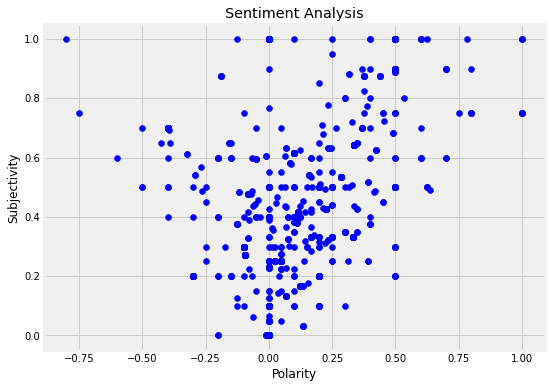

In [43]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 1):
  plt.scatter(tweet_df_new['polarity'], tweet_df_new['subjectivity'], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()

In [39]:
#Get the percentag of positive tweets
ptweets=tweet_df_new[tweet_df_new.Analysis =='Positive']
ptweets=ptweets['text']
round((ptweets.shape[0] / tweet_df_new.shape[0])*100, 1)

47.2

In [40]:
#Get the percentag of Negative tweets
ntweets=tweet_df_new[tweet_df_new.Analysis =='Negative']
ntweets=ntweets['text']
round((ntweets.shape[0] / tweet_df_new.shape[0])*100, 1)

16.2

In [41]:
#Get the percentag of Nutral tweets
ntweets=tweet_df_new[tweet_df_new.Analysis =='Nutral']
ntweets=ntweets['text']
round((ntweets.shape[0] / tweet_df_new.shape[0])*100, 1)

36.5

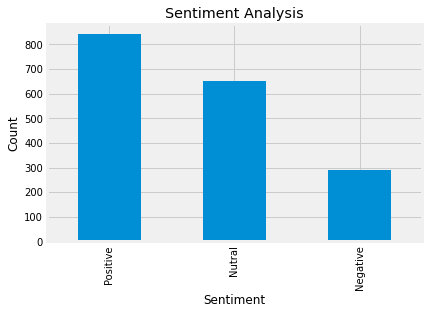

In [42]:
#show the value count
tweet_df_new['Analysis'].value_counts()

#plot and visualize the count 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweet_df_new['Analysis'].value_counts().plot(kind='bar')
plt.show()